maintainer = seyedamirzare77@gmail.com

Before this you have to get your API key from kaggle and make ~/.kaggle directory and then copy (or move) kaggle.json to ~/.kaggle/kaggle.json.

In [89]:
# from google.colab import drive
# drive.mount('/content/drive')

In [90]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 99% 764M/775M [00:18<00:00, 33.2MB/s]
100% 775M/775M [00:18<00:00, 43.6MB/s]


In [91]:
!unzip -qq dog-and-cat-classification-dataset.zip

In [92]:
import os
import shutil

In [93]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/PetImages'

# The directory where we will
# store our smaller dataset
base_dir = '/content/subset'
os.makedirs(base_dir , exist_ok=True)

In [94]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir , exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir , exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir , exist_ok=True)

In [95]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [96]:
# Copy first 1000 cat images to train_cats_dir
all_files = os.listdir(f'{original_dataset_dir}/Cat')

# Filter out directories (keep only files)
cat_files = [f for f in all_files if os.path.isfile(os.path.join(f'{original_dataset_dir}/Cat', f))]

# Copy first 1000 files
for fname in cat_files[:1000]:
    src = os.path.join(f'{original_dataset_dir}/Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [97]:
# Copy next 500 cat images to validation_cats_dir
for fname in cat_files[1000:1500]:
    src = os.path.join(f'{original_dataset_dir}/Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
for fname in cat_files[1500:2000]:
    src = os.path.join(f'{original_dataset_dir}/Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [98]:
# Copy first 1000 cat images to train_cats_dir
all_files = os.listdir(f'{original_dataset_dir}/Dog')

# Filter out directories (keep only files)
cat_files = [f for f in all_files if os.path.isfile(os.path.join(f'{original_dataset_dir}/Dog', f))]

# Copy first 1000 files
for fname in cat_files[:1000]:
    src = os.path.join(f'{original_dataset_dir}/Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [99]:
# Copy next 500 dog images to validation_dogs_dir

for fname in cat_files[1000:1500]:
    src = os.path.join(f'{original_dataset_dir}/Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir

for fname in cat_files[1500:2000]:
    src = os.path.join(f'{original_dataset_dir}/Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [100]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [123]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [124]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'  # Change to categorical
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'  # Change to categorical
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [127]:
data, label = next(iter(train_generator))

In [128]:
label.shape

(20, 2)

In [129]:
label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [131]:
data.shape

(20, 150, 150, 3)

In [132]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 2)


In [133]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
 41/100 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.5331 - loss: 0.6922

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - acc: 0.5296 - loss: 0.6915 - val_acc: 0.5240 - val_loss: 0.6854
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.5589 - loss: 0.6826 - val_acc: 0.6120 - val_loss: 0.6683
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - acc: 0.6082 - loss: 0.6711 - val_acc: 0.5120 - val_loss: 0.7053
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - acc: 0.6200 - loss: 0.6541 - val_acc: 0.5550 - val_loss: 0.7049
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.6433 - loss: 0.6264 - val_acc: 0.6540 - val_loss: 0.6246
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.6908 - loss: 0.5932 - val_acc: 0.6740 - val_loss: 0.6029
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.7164 - loss: 0.5591 - val_acc: 0.6740 - val_loss: 0.5924
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - acc: 0.7373 - loss: 0.5291 - val_acc: 0.6850 - val_loss: 0.5926
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - ac

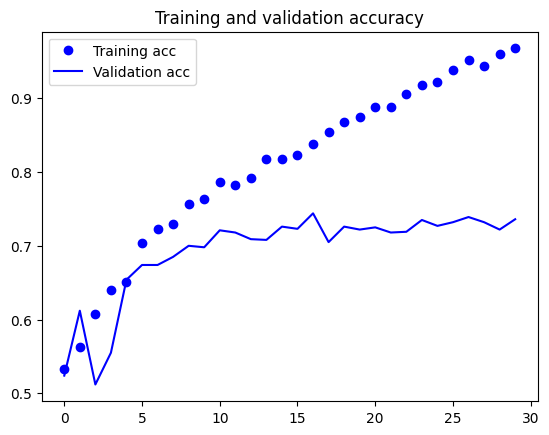

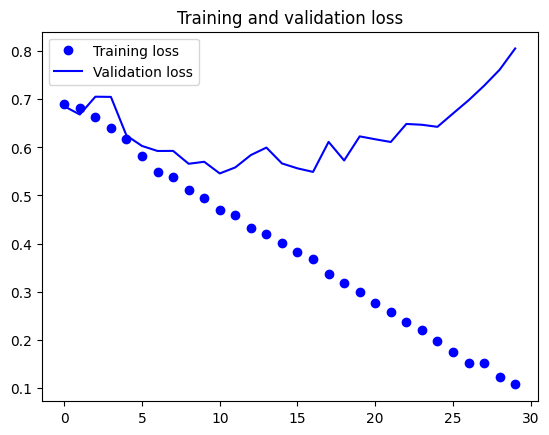

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [137]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - acc: 0.5051 - loss: 0.6957 - val_acc: 0.5080 - val_loss: 0.6896
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.5275 - loss: 0.6900 - val_acc: 0.5740 - val_loss: 0.6815
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.5557 - loss: 0.6784 - val_acc: 0.5330 - val_loss: 0.6773
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - acc: 0.5805 - loss: 0.6672 - val_acc: 0.6320 - val_loss: 0.6511
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.6361 - loss: 0.6450 - val_acc: 0.6300 - val_loss: 0.6353
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - acc: 0.6654 - loss: 0.6203 - val_acc: 0.6720 - val_loss: 0.6135
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.6949 - loss: 0.5948 - val_acc: 0.6790 - val_loss: 0.5911
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.7014 - loss: 0.5871 - val_acc: 0.6900 - val_loss: 0.5861
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━

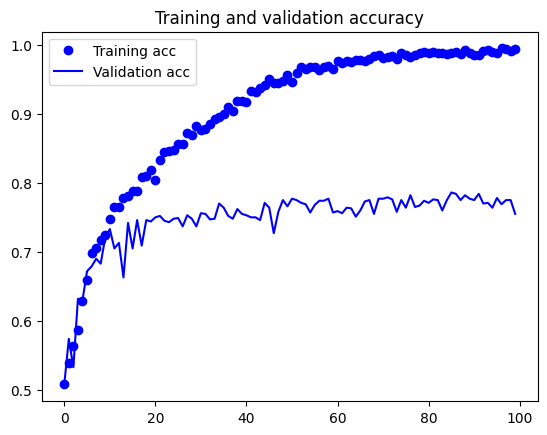

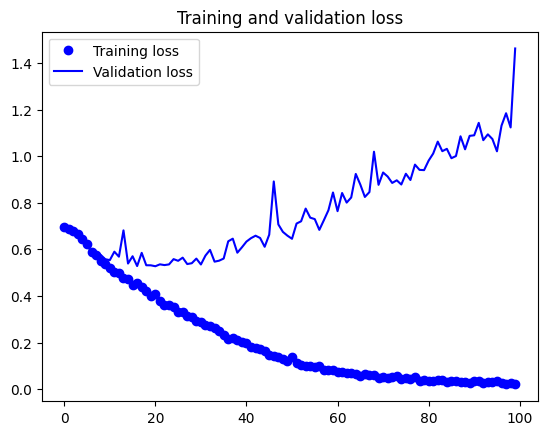

In [138]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

with Data Augmentations

In [140]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

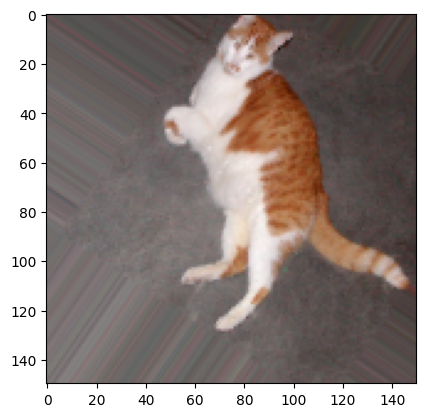

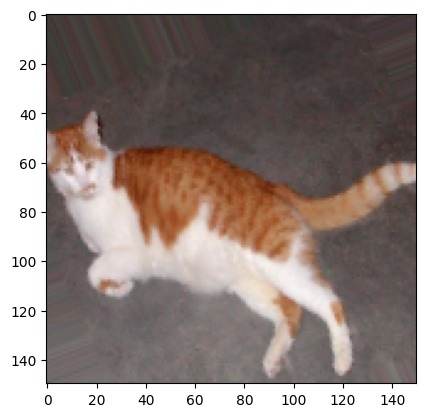

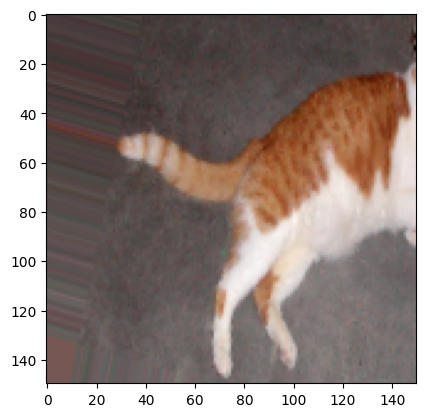

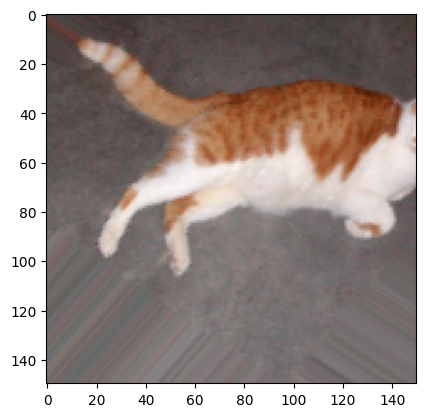

In [149]:
import keras.utils as image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[900]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [151]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [152]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
47/63 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - acc: 0.4880 - loss: 0.6950

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - acc: 0.4885 - loss: 0.6949 - val_acc: 0.5680 - val_loss: 0.6918
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - acc: 0.5004 - loss: 0.6920 - val_acc: 0.5000 - val_loss: 0.6912
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - acc: 0.5412 - loss: 0.6900 - val_acc: 0.5780 - val_loss: 0.6858
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - acc: 0.5442 - loss: 0.6889 - val_acc: 0.5970 - val_loss: 0.6768
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - acc: 0.5678 - loss: 0.6842 - val_acc: 0.6060 - val_loss: 0.6696
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - acc: 0.5971 - loss: 0.6716 - val_acc: 0.5320 - val_loss: 0.6948
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - acc: 0.5871 - loss: 0.6704 - val_acc: 0.5500 - val_loss: 0.6819
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - acc: 0.5967 - loss: 0.6585 - val_acc: 0.6000 - val_loss: 0.6593
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/ste

In [ ]:
# model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()